# <span style="color:blue">EVAC Workshop 1: Introduction to GAs in DEAP</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>

Before participating in this practical make sure that you have watched the pre-wrokshop materials:
- Lectures 1, 2a and 2b
- Code walkthroughs 1 and 2

# Colab Packages Install

In [44]:
!pip install deap

You should consider upgrading via the 'C:\users\ivanb\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## <span style="color:#0073e6">Learning objectives</span>

- To gain familiarity with the DEAP toolbox for Python
- To understand how to code a simple GA
- To understand crossover, selection, representation, and fitness functions
- To appreciate how algorithm parameterization can affect performance

# <span style="color:blue">Practical Instructions</span>

Below is a max-ones problem implementation (mentioned in the walkthrough) along with a simple GA solution in DEAP. Run the problem and examine the results. Then follow the exercises that follow the code.

# <span style="color:blue">Max Ones implementation</span>

In [45]:
import random
import numpy
import matplotlib.pyplot as plt
from deap import algorithms, base, creator, tools

In [46]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return (sum(individual),)

toolbox.register("evaluate", evalOneMax)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)

In [47]:
logbook = tools.Logbook()
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [48]:
pop = toolbox.population(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

In [49]:
NGEN = 100
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

In [50]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")

Text(0, 0.5, 'Mean Fitness')

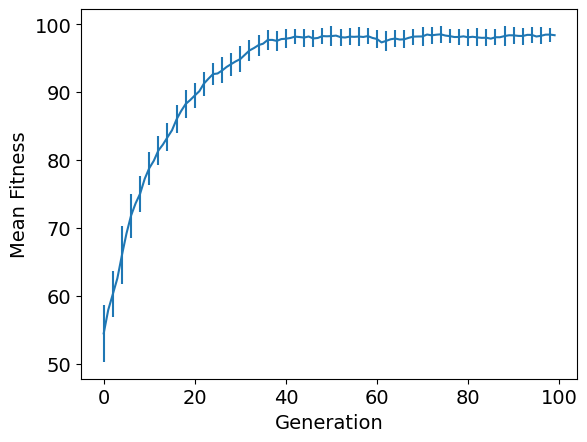

In [51]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [52]:
print(logbook)

gen	avg  	std    	min	max
0  	54.45	4.20327	43 	66 
1  	57.92	3.53463	48 	65 
2  	60.22	3.40464	52 	69 
3  	62.56	4.19361	53 	71 
4  	65.97	4.25783	56 	75 
5  	69.16	3.44883	61 	77 
6  	71.79	3.26587	64 	79 
7  	73.6 	2.87054	67 	82 
8  	75.04	2.653  	68 	82 
9  	77.21	2.80462	69 	84 
10 	78.79	2.42609	72 	84 
11 	79.88	2.39282	74 	85 
12 	81.39	2.17667	77 	87 
13 	82.27	2.23989	77 	87 
14 	83.34	2.0747 	77 	88 
15 	84.38	2.43631	76 	90 
16 	85.98	2.05417	81 	91 
17 	87.21	2.32075	79 	92 
18 	88.25	2.11837	82 	93 
19 	88.83	2.03497	83 	93 
20 	89.5 	1.87883	85 	94 
21 	90.13	1.88497	85 	96 
22 	91.25	1.76847	88 	95 
23 	91.97	1.86791	87 	96 
24 	92.65	1.59609	88 	96 
25 	92.74	1.8145 	85 	96 
26 	93.18	1.9151 	88 	98 
27 	93.71	1.65708	90 	98 
28 	94.13	1.69502	90 	98 
29 	94.53	1.56496	90 	98 
30 	94.87	1.88497	90 	99 
31 	95.5 	1.82483	90 	100
32 	96.13	1.53398	92 	100
33 	96.49	1.80829	92 	100
34 	96.92	1.54065	92 	100
35 	97.13	1.67126	93 	100
36 	97.68	1.44139	94 	100
37 	97.69	1.

In [53]:
print(tools.selBest(pop, 1))

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# <span style="color:blue">Exercise 1: Getting to know the GA</span>

- Try playing with the crossover and mutation probabilities. Can you tweak these parameters to improve performance? Why does the performance improve / not improve / get worse?

- Change the line that creates the fitness class, change weights=(1.0,) to weights=(-1.0,)). This changes the problem from a maximization problem to a minimization problem. What effect does this have?

In [54]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("IndividualMin", list, fitness=creator.FitnessMin)
toolbox.register("individualMin", tools.initRepeat, creator.IndividualMin, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individualMin)

In [55]:
pop = toolbox.population(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit


NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

Text(0, 0.5, 'Mean Fitness')

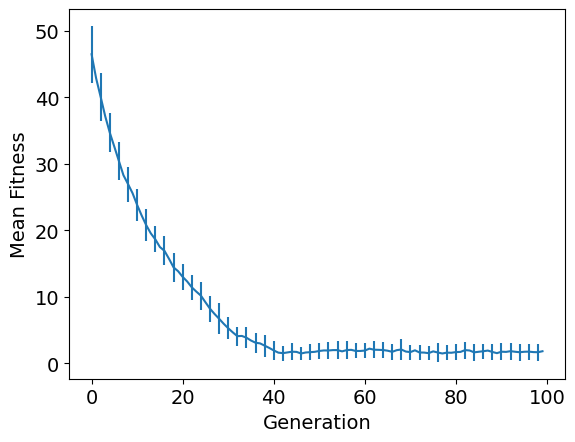

In [56]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [57]:
print(tools.selBest(pop, 1))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


- This code currently using two-point crossover to combine the genomes of selected parents to produce offspring. This produces offspring by selecting two random positions on the genome, and swapping values between these two positions. Uniform crossover randomly swaps values at each location in the genome with a given probability. Let’s begin customizing our algorithm using uniform crossover instead. Find the definition of the crossover operator, which has been registered in the toolbox as the function ‘mate’. Now change the operator (you can use the Library Reference to find the built-in command for this). Run the program.

You might see the following error:  

``TypeError: cxUniform() takes exactly 3 arguments (2 given)``  

A quick look at the documentation for the cxUniform function will show you that this is because the new crossover function takes an extra argument: the probability of a swap at each position (locus) in the genome. Find the part of the code where mating occurs and pass the toolbox.mate command the extra parameter value (say 0.1). Alternatively, you can define the comment when you register cxUnifrom as “mate”. Now your code will run.


# <span style="color:blue">Exercise 2: Implement a Real Valued Version</span>

Modify the code so that instead of counting binary 1s, the problem is to maximize the total value of genes whose values are real numbers between 0 and 1, inclusive. For example [0.5, 0.2, 0.1, 0.3] would give a fitness value of 1.1.

In [58]:
toolbox.register("attr_real", random.random)
toolbox.register("individual_real", tools.initRepeat, creator.Individual, toolbox.attr_real, n=100)
toolbox.register("population_real", tools.initRepeat, list, toolbox.individual_real)

pop = toolbox.population_real(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit


NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

Text(0, 0.5, 'Mean Fitness')

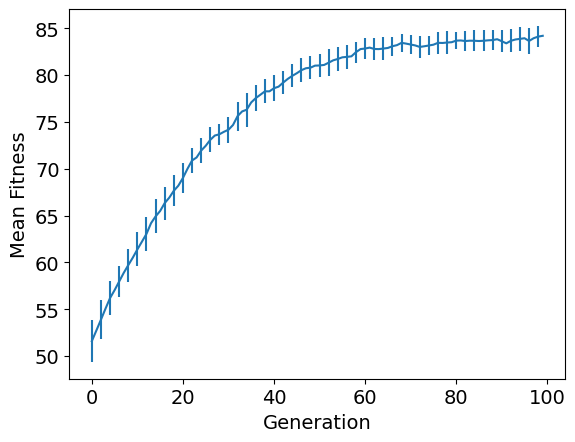

In [59]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [60]:
print(tools.selBest(pop, 1))

[[0.849994285260142, 0.6335798661273371, 0.8758280962244511, 0.808677180845058, 0.8511030252109882, 0.8418627336751682, 0.8957552938029549, 0.9606753198621639, 0.9373985010472775, 1.0, 0.8995217674165642, 0.6803941949226985, 0.914408855325631, 1.0, 0.988651772267089, 1.0, 1.0, 0.9936553682789285, 0.9814251410592854, 1.0, 0.7960660829495291, 0.9539336000200815, 0.5632252410085858, 1.0, 1.0, 1.0, 0.983220182783787, 1.0, 1.0, 1.0, 0.9346982172860135, 0.5228093793366702, 0.9783018663345372, 0.9697453985655766, 0.3961679002287921, 0.7798276691639286, 1.0, 0.36254987596498955, 0.9532456624304446, 0.6881915437662128, 1.0, 0.8976726424900131, 0.8291489327654389, 1.0, 0.8523664560597841, 0.9450479930709035, 0.9903485895318077, 0.9954185963977108, 0.8729913164244917, 0.8625247944824486, 0.9685880908743177, 0.7949109606833551, 0.7190866563535241, 0.9781433771274842, 0.9022708341265482, 0.7732245356169467, 1.0, 1.0, 0.7465699209108371, 0.572071343134649, 0.9203250577666056, 0.9318519155377031, 0.9

# <span style="color:blue">Exercise 3: Write your own operator</span>

Let’s write our own mutation operator and register it in the toolbox.  Implement a uniform operator for the real valued version that replaces each value in the genome with a random uniform number between 0 and 1 using a fixed mutation probability per gene, or that adds a float number to the gene.
To do this, you need to write your own Python function that takes in an individual, and anything else you need (e.g. probability of mutation per gene) and modifies the individual. The function should return a tuple, with the individual as the first element  e.g. return individual,

# <span style="color:blue">Exercise 4: Change the problem to a ‘deceptive’ problem</span>

This exercise will test your understanding of the principles in this practical and teach you about the impact of choices of representation.

First, revert back to the original Max Ones code. Now modify the Max Ones problem to implement the following ‘deceptive’ problem. A deceptive problem is just a problem that has local optima in which the algorithm can become trapped. Note that the standard Max Ones problem only has a global optimum.

In this problem, the bit string should be split into six blocks of three bits, where each block is assigned a partial fitness based on the number of ones in that block. Here is an example individual:

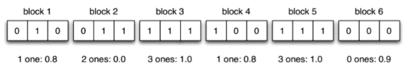

The fitness for each block of three is given as follows:
- 0 ones: partial fitness 0.9
- 1 ones: partial fitness 0.8
- 2 ones: partial fitness 0.0
- 3 ones: partial fitness 1.0

The fitness of the entire string is then determined by calculating the summed value over all blocks. For example, the individual above has a fitness of:  
``(0.8 + 0.0 + 1.0 + 0.8 + 1.0 + 0.9) = 4.5``

**Your task: Set the length of the individuals to 18 and implement this problem.**

<span style="color:green">Questions to think about:  </span>
- <span style="color:green">What is it about this fitness landscape that makes it (for some algorithms) difficult to traverse?  </span>
- <span style="color:green">What is the global optimum for this problem? What do you think the fitness landscape looks like?  </span>
- <span style="color:green">Run the algorithm multiple times. Do you get the same result each time?  </span>
- <span style="color:green">Does your algorithm find the global optimum? Why?  </span>
- <span style="color:green">Can you improve the result by changing parameters or operators?</span>

# <span style="color:blue">Exercise 5: Multiple runs</span>

Genetic algorithms are stochastic. As such, you might get a different result every time you run it; sometimes, for example, getting stuck on local optima and sometimes now. Try to modify the algorithm to run 50 times. Then record and plot a distribution of the final mean fitness scores. The matplotlib code for a density plot is:  

```plt.hist(avgRuns, density=True, bins=10)```  
(You might need to change the number of bins).

You should see that, for this problem, there's no a lot of variation. But this is unusual with harder problems.